In [4]:
import pandas as pd
import numpy as np
# data=pd.read_csv("titanic-passengers")
f = open("titanic-passengers.txt", "r")
data = f.read()
type(data)

str

In [5]:
import pandas as pd
import numpy as np
# data=pd.read_csv("titanic-passengers")
#f = open("titanic-passengers", "r")
df = pd.read_csv("titanic-passengers (4).csv",delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [6]:
df.fillna(df.mean(),inplace=True)

In [7]:
df["Cabin"].fillna(df.Cabin.value_counts().argmax(),inplace=True)

In [8]:
df["Embarked"].fillna(df.Embarked.value_counts().argmax(),inplace=True)

In [9]:
df.isnull().sum()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,0,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,0,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,0,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


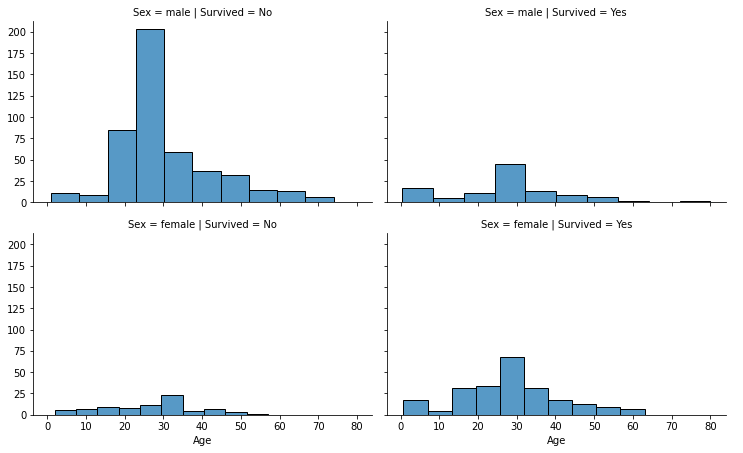

In [10]:
import seaborn as sns
grid = sns.FacetGrid(df, row="Sex", col="Survived", size=3.2, aspect=1.6)
grid.map(sns.histplot, "Age", bins=10)
grid.add_legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


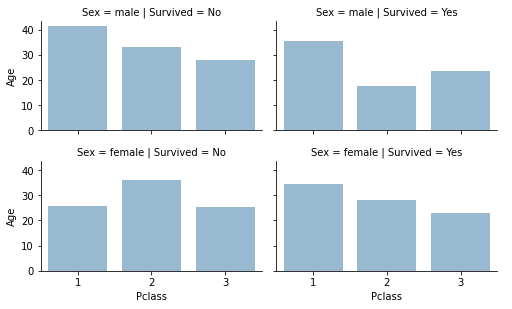

In [11]:
import seaborn as sns
grid1 = sns.FacetGrid(df, row="Sex", col="Survived", size=2.2, aspect=1.6)
grid1.map(sns.barplot, "Pclass","Age", alpha=.5, ci=None)
grid1.add_legend()

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

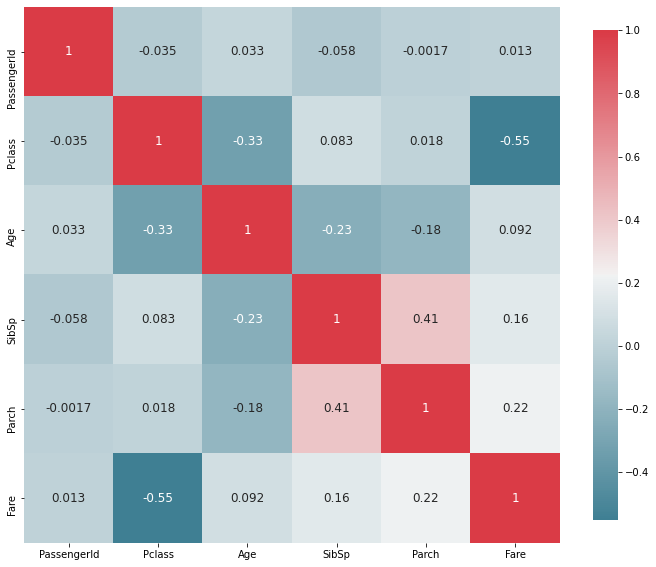

In [13]:
plot_correlation_map(df)

In [14]:
# cette fonction sert a faire une correlation entre les colonne existante du Dataframe, et plus la valeur seras moins 0.2 plus que ca signifie une correlation faible vis versa (0.2>correlation significative)
#les deux colognnes qui sont fortement correler sont Parch et SibSP et les deux colognes ayant une valeurs de corrélation tres faibles sont entre fare et Pclass


In [15]:
cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Promoted to numerical format
df.replace(cleanup, inplace=True)

In [16]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)

In [18]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,0,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,0,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,0,S
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,0,C
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,0,C
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,0,S
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,0,S


In [19]:
df1=df

In [20]:
df1['Title'] = df1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,0,S,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,F G73,S,Mr
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,0,S,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,0,S,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,0,C,Mrs
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,0,C,Mr
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,0,S,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,0,S,Mr


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


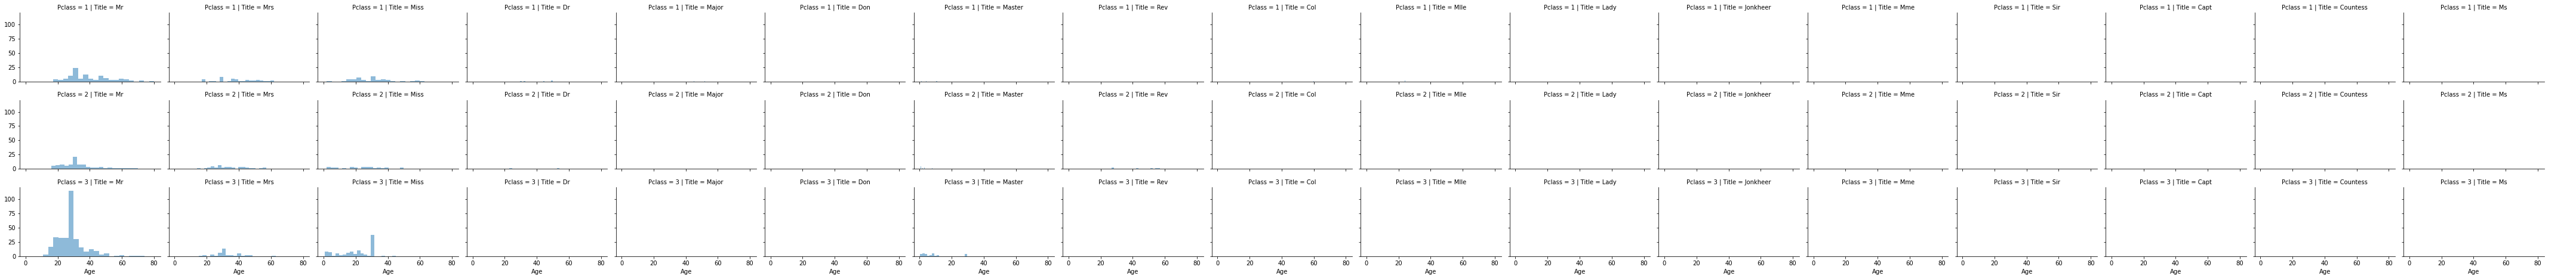

In [22]:
grid = sns.FacetGrid(df1, col='Title', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [23]:
df1['Title'] = df1['Title'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], 'Officier')
df1['Title'] = df1['Title'].replace(['Jonkheer', 'Don','Sir', 'Lady', 'Countess'], 'Royalty')
df1['Title'] = df1['Title'].replace(['Mlle', 'Mme'], 'Miss')
df1['Title'] = df1['Title'].replace('Mme', 'Mrs')
df1['Title'] = df1['Title'].replace(['Ms', 'Mr'], 'Mrs')

In [24]:
df1['Title'].unique()

array(['Mrs', 'Miss', 'Officier', 'Royalty', 'Master'], dtype=object)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


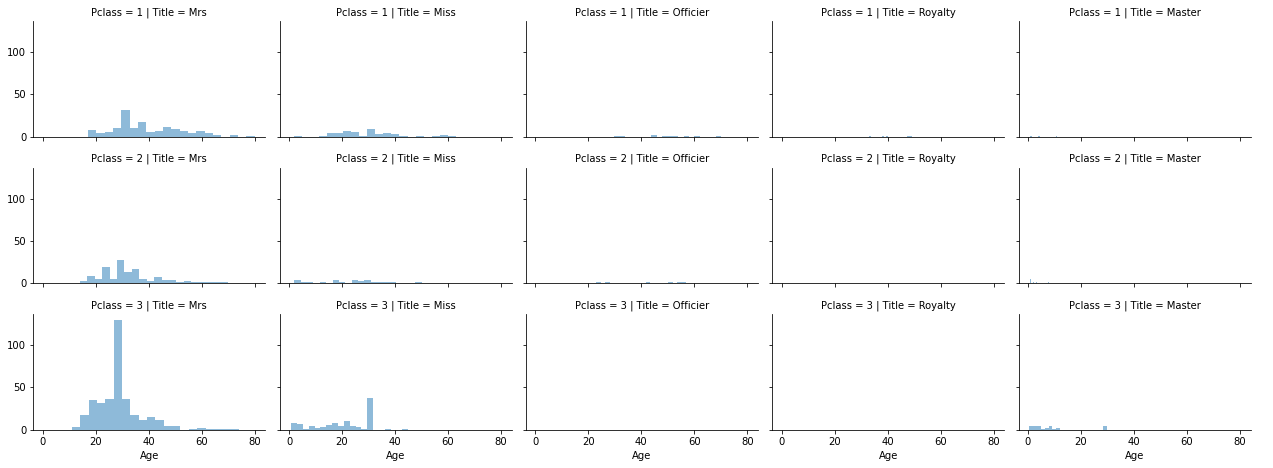

In [25]:
grid = sns.FacetGrid(df1, col='Title', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [26]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] 

In [27]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,0,S,Mrs,0
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,F G73,S,Mrs,0
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,0,S,Mrs,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,0,S,Mrs,4
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,B71,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,0,C,Mrs,1
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,0,C,Mrs,0
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,0,S,Miss,0
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,0,S,Mrs,0


In [28]:
df2=df1.copy()
df2["Age"].fillna(df1["Age"].median(skipna=True), inplace=True)
df2["Embarked"].fillna(df1["Age"].median(skipna=True), inplace=True)
df2.drop("Cabin",axis=1, inplace=True)
df2
df2.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [29]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,S,Mrs,0
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,S,Mrs,0
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,S,Mrs,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,S,Mrs,4
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C,Mrs,1
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,C,Mrs,0
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,S,Miss,0
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,S,Mrs,0


In [30]:
df2['TravelAlone']=np.where((df2['SibSp']+df2["Pclass"])>0,0,1)
df2.drop('SibSp', axis=1, inplace=True)
df2.drop('Parch', axis=1, inplace=True)

In [31]:
df2=pd.get_dummies(df2,columns=["Pclass","Embarked"])
df2.drop('Name', axis=1, inplace=True)
df2.drop('Title', axis=1, inplace=True)

In [32]:
df2.head()

,Survived,Sex,Age,Fare,FamilySize,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,0,male,28.0,13.0000,0,0,0,1,0,0,0,0,1
1,0,male,25.0,7.6500,0,0,0,0,1,0,0,0,1
2,0,male,20.0,7.8542,0,0,0,0,1,0,0,0,1
3,0,female,29.0,21.0750,4,0,0,0,1,0,0,0,1
4,0,male,31.0,52.0000,1,0,1,0,0,0,0,0,1


In [33]:
df2['Isminor']=np.where(df2['Age']<=16, 1,0)
df2

,Survived,Sex,Age,Fare,FamilySize,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_C,Embarked_Q,Embarked_S,Isminor
0,0,male,28.000000,13.0000,0,0,0,1,0,0,0,0,1,0
1,0,male,25.000000,7.6500,0,0,0,0,1,0,0,0,1,0
2,0,male,20.000000,7.8542,0,0,0,0,1,0,0,0,1,0
3,0,female,29.000000,21.0750,4,0,0,0,1,0,0,0,1,0
4,0,male,31.000000,52.0000,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,female,14.000000,30.0708,1,0,0,1,0,0,1,0,0,1
887,0,male,22.000000,7.2292,0,0,0,0,1,0,1,0,0,0
888,0,female,30.000000,8.6625,0,0,0,0,1,0,0,0,1,0
889,0,male,29.699118,7.8958,0,0,0,0,1,0,0,0,1,0


In [34]:
df2=df2.replace({'Sex':{'male':1,'female':0}})
df2

,Survived,Sex,Age,Fare,FamilySize,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_C,Embarked_Q,Embarked_S,Isminor
0,0,1,28.000000,13.0000,0,0,0,1,0,0,0,0,1,0
1,0,1,25.000000,7.6500,0,0,0,0,1,0,0,0,1,0
2,0,1,20.000000,7.8542,0,0,0,0,1,0,0,0,1,0
3,0,0,29.000000,21.0750,4,0,0,0,1,0,0,0,1,0
4,0,1,31.000000,52.0000,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,14.000000,30.0708,1,0,0,1,0,0,1,0,0,1
887,0,1,22.000000,7.2292,0,0,0,0,1,0,1,0,0,0
888,0,0,30.000000,8.6625,0,0,0,0,1,0,0,0,1,0
889,0,1,29.699118,7.8958,0,0,0,0,1,0,0,0,1,0


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   FamilySize   891 non-null    int64  
 5   TravelAlone  891 non-null    int32  
 6   Pclass_1     891 non-null    uint8  
 7   Pclass_2     891 non-null    uint8  
 8   Pclass_3     891 non-null    uint8  
 9   Embarked_0   891 non-null    uint8  
 10  Embarked_C   891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
 13  Isminor      891 non-null    int32  
dtypes: float64(2), int32(2), int64(3), uint8(7)
memory usage: 48.0 KB


In [36]:
df2['Age']=df2['Age'].astype(int)

In [37]:
df2

,Survived,Sex,Age,Fare,FamilySize,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_C,Embarked_Q,Embarked_S,Isminor
0,0,1,28,13.0000,0,0,0,1,0,0,0,0,1,0
1,0,1,25,7.6500,0,0,0,0,1,0,0,0,1,0
2,0,1,20,7.8542,0,0,0,0,1,0,0,0,1,0
3,0,0,29,21.0750,4,0,0,0,1,0,0,0,1,0
4,0,1,31,52.0000,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,14,30.0708,1,0,0,1,0,0,1,0,0,1
887,0,1,22,7.2292,0,0,0,0,1,0,1,0,0,0
888,0,0,30,8.6625,0,0,0,0,1,0,0,0,1,0
889,0,1,29,7.8958,0,0,0,0,1,0,0,0,1,0


In [38]:
X=df2.iloc[:,1:].values
y=df2.iloc[:,0].values

In [39]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7982062780269058


In [41]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
#from sklearn.feature_selection import RFE

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(X_train, y_train)   #fitting our model
y_pred=tree.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8026905829596412


In [42]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
#from sklearn.feature_selection import RFE


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=30)


#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(X_train, y_train)   #fitting our model
y_pred=tree.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044871794871795


In [43]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
#from sklearn.feature_selection import RFE


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(X_train, y_train)  #Training our model
y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.820627802690583


In [44]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
#from sklearn.feature_selection import RFE


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(X_train, y_train)  #Training our model
y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8666666666666667
